In [1]:
import os
import numpy as np
import pickle
from model import create_mini_xception, compile_model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

2025-07-14 02:46:49.198469: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-14 02:46:49.350204: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-14 02:46:49.505774: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752461209.636800   19454 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752461209.671314   19454 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1752461209.979683   19454 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

In [2]:
# Paths
TRAIN_DIR = "/workspaces/Emotion_detector/notebooks/FC110532_Haritha/base_model/preprocessed_data/train"
VAL_DIR = "/workspaces/Emotion_detector/notebooks/FC110532_Haritha/base_model/preprocessed_data/validation"
MODEL_SAVE_PATH = "/workspaces/Emotion_detector/notebooks/FC110532_Haritha/base_model/mini_xception_model.h5"

print("Configuration set!")
print(f"Train directory: {TRAIN_DIR}")
print(f"Validation directory: {VAL_DIR}")
print(f"Model will be saved to: {MODEL_SAVE_PATH}")

Configuration set!
Train directory: /workspaces/Emotion_detector/notebooks/FC110532_Haritha/base_model/preprocessed_data/train
Validation directory: /workspaces/Emotion_detector/notebooks/FC110532_Haritha/base_model/preprocessed_data/validation
Model will be saved to: /workspaces/Emotion_detector/notebooks/FC110532_Haritha/base_model/mini_xception_model.h5


In [3]:
def load_data(data_dir):
    """
    Load preprocessed images and labels
    """
    print(f"Loading data from {data_dir}...")
    
    # Load labels
    labels = np.load(os.path.join(data_dir, "labels.npy"))
    
    # Load images
    images = []
    for i in range(len(labels)):
        img_path = os.path.join(data_dir, f"img_{i}.npy")
        img = np.load(img_path)
        images.append(img)
    
    images = np.array(images)
    print(f"Loaded {len(images)} images with shape {images.shape}")
    
    return images, labels

print("Data loading function defined!")

Data loading function defined!


In [4]:
# Load training data
train_images, train_labels = load_data(TRAIN_DIR)
print(f"Training data loaded: {train_images.shape}")
print(f"Training labels shape: {train_labels.shape}")

Loading data from /workspaces/Emotion_detector/notebooks/FC110532_Haritha/base_model/preprocessed_data/train...
Loaded 28821 images with shape (28821, 64, 64, 1)
Training data loaded: (28821, 64, 64, 1)
Training labels shape: (28821,)


In [5]:
# Load validation data
val_images, val_labels = load_data(VAL_DIR)
print(f"Validation data loaded: {val_images.shape}")
print(f"Validation labels shape: {val_labels.shape}")

Loading data from /workspaces/Emotion_detector/notebooks/FC110532_Haritha/base_model/preprocessed_data/validation...
Loaded 7066 images with shape (7066, 64, 64, 1)
Validation data loaded: (7066, 64, 64, 1)
Validation labels shape: (7066,)


In [6]:
# Load label encoder to get number of classes
with open(os.path.join(TRAIN_DIR, "label_encoder.pkl"), "rb") as f:
    le = pickle.load(f)

num_classes = len(le.classes_)
print(f"Number of classes: {num_classes}")
print(f"Classes: {le.classes_}")

Number of classes: 7
Classes: ['angry' 'disgust' 'fear' 'happy' 'neutral' 'sad' 'surprise']


In [7]:
# Create and compile model
model = create_mini_xception(num_classes=num_classes)
model = compile_model(model)

# Print model summary
model.summary()
print(f"Total parameters: {model.count_params():,}")

2025-07-14 02:53:57.222581: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ depthwise_conv2d                │ (None, 64, 64, 32)     │           320 │
│ (DepthwiseConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 64)     │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_2 (ReLU)                  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ depthwise_conv2d_1              │ (None, 32, 32, 64)     │           640 │
│ (DepthwiseConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_3 (ReLU)                  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 128)    │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_4 (ReLU)                  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ depthwise_conv2d_2              │ (None, 16, 16, 128)    │         1,280 │
│ (DepthwiseConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_5 (ReLU)                  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 50,631 (197.78 KB)

 Trainable params: 49,223 (192.28 KB)

 Non-trainable params: 1,408 (5.50 KB)

Total parameters: 50,631


In [8]:
# Setup callbacks
callbacks = [
    ModelCheckpoint(
        MODEL_SAVE_PATH,
        monitor='val_accuracy',
        save_best_only=True,
        mode='max',
        verbose=1
    ),
    EarlyStopping(
        monitor='val_accuracy',
        patience=10,
        restore_best_weights=True,
        verbose=1
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.2,
        patience=5,
        min_lr=0.0001,
        verbose=1
    )
]

print("Callbacks configured:")
print("- ModelCheckpoint: Save best model based on validation accuracy")
print("- EarlyStopping: Stop training if no improvement for 10 epochs")
print("- ReduceLROnPlateau: Reduce learning rate when stuck")

Callbacks configured:
- ModelCheckpoint: Save best model based on validation accuracy
- EarlyStopping: Stop training if no improvement for 10 epochs
- ReduceLROnPlateau: Reduce learning rate when stuck


In [9]:
# Train model
print("Starting training...")
history = model.fit(
    train_images, train_labels,
    validation_data=(val_images, val_labels),
    epochs=50,
    batch_size=32,
    callbacks=callbacks,
    verbose=1
)

Starting training...
Epoch 1/50


2025-07-14 02:56:05.172549: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 472203264 exceeds 10% of free system memory.


901/901 ━━━━━━━━━━━━━━━━━━━━ 0s 506ms/step - accuracy: 0.2348 - loss: 1.9020
Epoch 1: val_accuracy improved from -inf to 0.29111, saving model to /workspaces/Emotion_detector/notebooks/FC110532_Haritha/base_model/mini_xception_model.h5


901/901 ━━━━━━━━━━━━━━━━━━━━ 481s 528ms/step - accuracy: 0.2348 - loss: 1.9019 - val_accuracy: 0.2911 - val_loss: 1.7626 - learning_rate: 0.0010
Epoch 2/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 0s 513ms/step - accuracy: 0.3243 - loss: 1.6763
Epoch 2: val_accuracy improved from 0.29111 to 0.37037, saving model to /workspaces/Emotion_detector/notebooks/FC110532_Haritha/base_model/mini_xception_model.h5


901/901 ━━━━━━━━━━━━━━━━━━━━ 481s 534ms/step - accuracy: 0.3243 - loss: 1.6762 - val_accuracy: 0.3704 - val_loss: 1.6195 - learning_rate: 0.0010
Epoch 3/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 0s 531ms/step - accuracy: 0.3768 - loss: 1.5797
Epoch 3: val_accuracy did not improve from 0.37037
901/901 ━━━━━━━━━━━━━━━━━━━━ 499s 554ms/step - accuracy: 0.3768 - loss: 1.5796 - val_accuracy: 0.3614 - val_loss: 1.5962 - learning_rate: 0.0010
Epoch 4/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 0s 546ms/step - accuracy: 0.4220 - loss: 1.4981
Epoch 4: val_accuracy did not improve from 0.37037
901/901 ━━━━━━━━━━━━━━━━━━━━ 513s 570ms/step - accuracy: 0.4220 - loss: 1.4981 - val_accuracy: 0.3214 - val_loss: 1.8945 - learning_rate: 0.0010
Epoch 5/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 0s 534ms/step - accuracy: 0.4514 - loss: 1.4366
Epoch 5: val_accuracy improved from 0.37037 to 0.37390, saving model to /workspaces/Emotion_detector/notebooks/FC110532_Haritha/base_model/mini_xception_model.h5


901/901 ━━━━━━━━━━━━━━━━━━━━ 502s 557ms/step - accuracy: 0.4514 - loss: 1.4366 - val_accuracy: 0.3739 - val_loss: 1.5575 - learning_rate: 0.0010
Epoch 6/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 0s 523ms/step - accuracy: 0.4713 - loss: 1.3875
Epoch 6: val_accuracy improved from 0.37390 to 0.45882, saving model to /workspaces/Emotion_detector/notebooks/FC110532_Haritha/base_model/mini_xception_model.h5


901/901 ━━━━━━━━━━━━━━━━━━━━ 491s 545ms/step - accuracy: 0.4713 - loss: 1.3874 - val_accuracy: 0.4588 - val_loss: 1.4165 - learning_rate: 0.0010
Epoch 7/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 0s 527ms/step - accuracy: 0.4861 - loss: 1.3489
Epoch 7: val_accuracy did not improve from 0.45882
901/901 ━━━━━━━━━━━━━━━━━━━━ 494s 548ms/step - accuracy: 0.4861 - loss: 1.3489 - val_accuracy: 0.4573 - val_loss: 1.4361 - learning_rate: 0.0010
Epoch 8/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 0s 521ms/step - accuracy: 0.4997 - loss: 1.3123
Epoch 8: val_accuracy improved from 0.45882 to 0.50042, saving model to /workspaces/Emotion_detector/notebooks/FC110532_Haritha/base_model/mini_xception_model.h5


901/901 ━━━━━━━━━━━━━━━━━━━━ 490s 544ms/step - accuracy: 0.4997 - loss: 1.3123 - val_accuracy: 0.5004 - val_loss: 1.3113 - learning_rate: 0.0010
Epoch 9/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 0s 517ms/step - accuracy: 0.5035 - loss: 1.2908
Epoch 9: val_accuracy did not improve from 0.50042
901/901 ━━━━━━━━━━━━━━━━━━━━ 487s 541ms/step - accuracy: 0.5035 - loss: 1.2908 - val_accuracy: 0.4846 - val_loss: 1.3689 - learning_rate: 0.0010
Epoch 10/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 0s 511ms/step - accuracy: 0.5212 - loss: 1.2643
Epoch 10: val_accuracy did not improve from 0.50042
901/901 ━━━━━━━━━━━━━━━━━━━━ 481s 534ms/step - accuracy: 0.5212 - loss: 1.2643 - val_accuracy: 0.4993 - val_loss: 1.3392 - learning_rate: 0.0010
Epoch 11/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 0s 511ms/step - accuracy: 0.5327 - loss: 1.2386
Epoch 11: val_accuracy did not improve from 0.50042
901/901 ━━━━━━━━━━━━━━━━━━━━ 480s 533ms/step - accuracy: 0.5327 - loss: 1.2387 - val_accuracy: 0.4537 - val_loss: 1.4890 - learning_rate: 0.0010

901/901 ━━━━━━━━━━━━━━━━━━━━ 552s 613ms/step - accuracy: 0.5355 - loss: 1.2158 - val_accuracy: 0.5130 - val_loss: 1.2832 - learning_rate: 0.0010
Epoch 13/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 0s 510ms/step - accuracy: 0.5481 - loss: 1.1926
Epoch 13: val_accuracy improved from 0.51302 to 0.51458, saving model to /workspaces/Emotion_detector/notebooks/FC110532_Haritha/base_model/mini_xception_model.h5


901/901 ━━━━━━━━━━━━━━━━━━━━ 479s 531ms/step - accuracy: 0.5481 - loss: 1.1926 - val_accuracy: 0.5146 - val_loss: 1.2862 - learning_rate: 0.0010
Epoch 14/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 0s 511ms/step - accuracy: 0.5537 - loss: 1.1861
Epoch 14: val_accuracy did not improve from 0.51458
901/901 ━━━━━━━━━━━━━━━━━━━━ 480s 533ms/step - accuracy: 0.5537 - loss: 1.1861 - val_accuracy: 0.5021 - val_loss: 1.3378 - learning_rate: 0.0010
Epoch 15/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 0s 512ms/step - accuracy: 0.5585 - loss: 1.1673
Epoch 15: val_accuracy did not improve from 0.51458
901/901 ━━━━━━━━━━━━━━━━━━━━ 482s 535ms/step - accuracy: 0.5585 - loss: 1.1673 - val_accuracy: 0.4960 - val_loss: 1.3407 - learning_rate: 0.0010
Epoch 16/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 0s 511ms/step - accuracy: 0.5756 - loss: 1.1404
Epoch 16: val_accuracy did not improve from 0.51458
901/901 ━━━━━━━━━━━━━━━━━━━━ 481s 533ms/step - accuracy: 0.5756 - loss: 1.1404 - val_accuracy: 0.5068 - val_loss: 1.3494 - learning_rate: 0.00


Epoch 17: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
901/901 ━━━━━━━━━━━━━━━━━━━━ 480s 533ms/step - accuracy: 0.5738 - loss: 1.1255 - val_accuracy: 0.5214 - val_loss: 1.3219 - learning_rate: 0.0010
Epoch 18/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 0s 505ms/step - accuracy: 0.6034 - loss: 1.0626
Epoch 18: val_accuracy improved from 0.52137 to 0.55746, saving model to /workspaces/Emotion_detector/notebooks/FC110532_Haritha/base_model/mini_xception_model.h5


901/901 ━━━━━━━━━━━━━━━━━━━━ 475s 527ms/step - accuracy: 0.6034 - loss: 1.0626 - val_accuracy: 0.5575 - val_loss: 1.1894 - learning_rate: 2.0000e-04
Epoch 19/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 0s 509ms/step - accuracy: 0.6060 - loss: 1.0424
Epoch 19: val_accuracy did not improve from 0.55746
901/901 ━━━━━━━━━━━━━━━━━━━━ 479s 532ms/step - accuracy: 0.6060 - loss: 1.0424 - val_accuracy: 0.5542 - val_loss: 1.1860 - learning_rate: 2.0000e-04
Epoch 20/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 0s 505ms/step - accuracy: 0.6019 - loss: 1.0437
Epoch 20: val_accuracy improved from 0.55746 to 0.56128, saving model to /workspaces/Emotion_detector/notebooks/FC110532_Haritha/base_model/mini_xception_model.h5


901/901 ━━━━━━━━━━━━━━━━━━━━ 477s 530ms/step - accuracy: 0.6019 - loss: 1.0437 - val_accuracy: 0.5613 - val_loss: 1.1794 - learning_rate: 2.0000e-04
Epoch 21/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 0s 506ms/step - accuracy: 0.6132 - loss: 1.0307
Epoch 21: val_accuracy did not improve from 0.56128
901/901 ━━━━━━━━━━━━━━━━━━━━ 476s 528ms/step - accuracy: 0.6132 - loss: 1.0307 - val_accuracy: 0.5572 - val_loss: 1.1739 - learning_rate: 2.0000e-04
Epoch 22/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 0s 511ms/step - accuracy: 0.6186 - loss: 1.0128
Epoch 22: val_accuracy did not improve from 0.56128
901/901 ━━━━━━━━━━━━━━━━━━━━ 482s 535ms/step - accuracy: 0.6186 - loss: 1.0128 - val_accuracy: 0.5549 - val_loss: 1.1840 - learning_rate: 2.0000e-04
Epoch 23/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 0s 513ms/step - accuracy: 0.6215 - loss: 1.0164
Epoch 23: val_accuracy did not improve from 0.56128
901/901 ━━━━━━━━━━━━━━━━━━━━ 482s 535ms/step - accuracy: 0.6215 - loss: 1.0164 - val_accuracy: 0.5570 - val_loss: 1.1821 - learnin

901/901 ━━━━━━━━━━━━━━━━━━━━ 520s 577ms/step - accuracy: 0.6319 - loss: 0.9837 - val_accuracy: 0.5664 - val_loss: 1.1729 - learning_rate: 1.0000e-04
Epoch 29/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 0s 600ms/step - accuracy: 0.6363 - loss: 0.9727
Epoch 29: val_accuracy did not improve from 0.56637
901/901 ━━━━━━━━━━━━━━━━━━━━ 563s 625ms/step - accuracy: 0.6363 - loss: 0.9727 - val_accuracy: 0.5613 - val_loss: 1.1721 - learning_rate: 1.0000e-04
Epoch 30/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 0s 573ms/step - accuracy: 0.6348 - loss: 0.9701
Epoch 30: val_accuracy did not improve from 0.56637
901/901 ━━━━━━━━━━━━━━━━━━━━ 540s 599ms/step - accuracy: 0.6348 - loss: 0.9701 - val_accuracy: 0.5529 - val_loss: 1.1944 - learning_rate: 1.0000e-04
Epoch 31/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 0s 602ms/step - accuracy: 0.6327 - loss: 0.9746
Epoch 31: val_accuracy did not improve from 0.56637
901/901 ━━━━━━━━━━━━━━━━━━━━ 564s 626ms/step - accuracy: 0.6327 - loss: 0.9746 - val_accuracy: 0.5587 - val_loss: 1.1854 - learnin

In [10]:
# Final evaluation
train_loss, train_acc = model.evaluate(train_images, train_labels, verbose=0)
val_loss, val_acc = model.evaluate(val_images, val_labels, verbose=0)

print(f"\nFinal Results:")
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Validation Accuracy: {val_acc:.4f}")
print(f"Train Loss: {train_loss:.4f}")
print(f"Validation Loss: {val_loss:.4f}")

print(f"\nModel saved to: {MODEL_SAVE_PATH}")

2025-07-14 08:43:59.060451: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 472203264 exceeds 10% of free system memory.



Final Results:
Train Accuracy: 0.6700
Validation Accuracy: 0.5664
Train Loss: 0.8936
Validation Loss: 1.1729

Model saved to: /workspaces/Emotion_detector/notebooks/FC110532_Haritha/base_model/mini_xception_model.h5


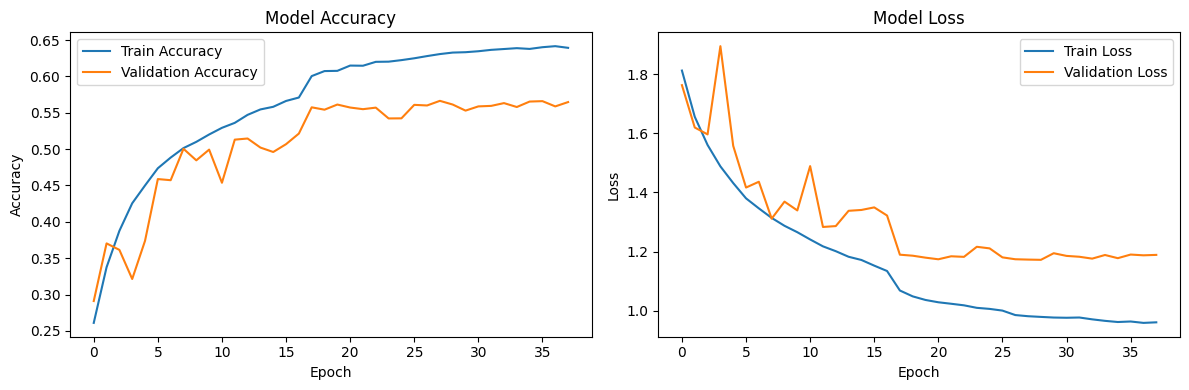

In [11]:
import matplotlib.pyplot as plt

# Plot training history
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [12]:
# Test loading the saved model
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model(MODEL_SAVE_PATH)
print("Model loaded successfully!")

# Quick test
test_loss, test_acc = loaded_model.evaluate(val_images, val_labels, verbose=0)
print(f"Loaded model validation accuracy: {test_acc:.4f}")

Model loaded successfully!
Loaded model validation accuracy: 0.5664
